### Introduction
The question I am answering is how economics and social conditions impact a country's educational well-being. This analysis can be used by domestic and international governments (policy makers, grassroots, civilians, etc.) to identify the most pressing issues involved with a country's education. They can then tailor their decisions and policies to relieve any correlational educational distress.

Definitions for this project:
* Economic well-being will be measured in PISA score (feature: rating) 
* PISA - Programme for International Student Assessment, is a triennial international assessment that measures 15-year-old students' literacy skills in reading, mathematics, and science. It is organized by the Organisation for Economic Co-operation and Development (OECD) to evaluate how well education systems prepare students for real-world challenges. The assessment focuses on how well students can apply their knowledge, rather than just what they have memorized. 
* PISA score range: 0 to 1000 points (highest possible score)
* PISA score mean: 500 points
* PISA score standard deviation: 100 points


In [2724]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression

from sklearn.dummy import DummyRegressor

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error


In [2725]:
# Reading into data file

df = pd.read_csv('economics_and_education_dataset_CSV.csv')
df

,index_code,expenditure_on _education_pct_gdp,mortality_rate_infant,gini_index,gdp_per_capita_ppp,inflation_consumer_prices,intentional_homicides,unemployment,gross_fixed_capital_formation,population_density,suicide_mortality_rate,tax_revenue,taxes_on_income_profits_capital,alcohol_consumption_per_capita,government_health_expenditure_pct_gdp,urban_population_pct_total,country,time,sex,rating
0,AUS-2003,5.246357,4.9,33.5,30121.818418,2.732596,1.533073,5.933,26.050295,2.567036,10.5,24.299970,62.726546,NaN,5.623778,84.343,AUS,2003,BOY,527.0
1,AUS-2003,5.246357,4.9,33.5,30121.818418,2.732596,1.533073,5.933,26.050295,2.567036,10.5,24.299970,62.726546,NaN,5.623778,84.343,AUS,2003,GIRL,522.0
2,AUS-2003,5.246357,4.9,33.5,30121.818418,2.732596,1.533073,5.933,26.050295,2.567036,10.5,24.299970,62.726546,NaN,5.623778,84.343,AUS,2003,TOT,524.0
3,AUS-2006,4.738430,4.7,NaN,34846.715630,3.555288,1.372940,4.785,27.789132,2.662089,10.6,24.511772,65.231562,NaN,5.719998,84.700,AUS,2006,BOY,527.0
4,AUS-2006,4.738430,4.7,NaN,34846.715630,3.555288,1.372940,4.785,27.789132,2.662089,10.6,24.511772,65.231562,NaN,5.719998,84.700,AUS,2006,GIRL,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629,BRA-2015,6.241060,14.3,51.9,14692.632307,9.029901,28.356406,8.538,17.835807,24.549506,5.9,13.629629,22.863583,8.19602,3.853849,85.770,BRA,2015,GIRL,370.0
630,BRA-2015,6.241060,14.3,51.9,14692.632307,9.029901,28.356406,8.538,17.835807,24.549506,5.9,13.629629,22.863583,8.19602,3.853849,85.770,BRA,2015,TOT,377.0
631,BRA-2018,6.088510,13.5,53.9,14971.054667,3.664850,26.636013,12.330,15.096912,25.145139,7.0,13.940108,24.501440,NaN,3.889238,86.569,BRA,2018,BOY,388.0
632,BRA-2018,6.088510,13.5,53.9,14971.054667,3.664850,26.636013,12.330,15.096912,25.145139,7.0,13.940108,24.501440,NaN,3.889238,86.569,BRA,2018,GIRL,379.0


In [2726]:
# Display null/na count

print("Amount of null", df.isnull().sum())


Amount of null index_code                                 0
expenditure_on _education_pct_gdp         36
mortality_rate_infant                      0
gini_index                                97
gdp_per_capita_ppp                         0
inflation_consumer_prices                  0
intentional_homicides                     75
unemployment                               0
gross_fixed_capital_formation              0
population_density                         0
suicide_mortality_rate                     0
tax_revenue                               48
taxes_on_income_profits_capital           48
alcohol_consumption_per_capita           523
government_health_expenditure_pct_gdp      0
urban_population_pct_total                 0
country                                    0
time                                       0
sex                                        0
rating                                     0
dtype: int64


In [2727]:
# Data preprocessing


# Identify the columns with missing values
columns_with_missing = df.columns[df.isnull().any()].tolist()

# Fill those missing values with the mean
for col in columns_with_missing:
  df[col].fillna(df[col].mean(), inplace=True) # found out replacing missing data with mean or median is far better for model accuracy than mode is

string_columns = []
for col in df.columns:

    # If all values can be converted to numeric without errors,
    # consider it as a numeric column.
    if df[col].apply(pd.to_numeric, errors='coerce').notna().all():
        continue

    # Otherwise it's a string (categorical) column,
    string_columns.append(col)

# Store country name tags
countries = pd.factorize(df['country'])[1] # Incase I need it

# Convert the string to a numeric value using factorize 
for col in string_columns:
    df[col] = pd.factorize(df[col])[0]


/var/folders/v5/m2dl5w7d7d3g58kr6_4w6__m0000gn/T/ipykernel_20605/1922788612.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True) # found out replacing missing data with mean or median is far better for model accuracy than mode is


expenditure_on _education_pct_gdp        1.000000
government_health_expenditure_pct_gdp    0.397678
tax_revenue                              0.357036
urban_population_pct_total               0.317562
gdp_per_capita_ppp                       0.127724
rating                                   0.102876
taxes_on_income_profits_capital          0.093670
suicide_mortality_rate                   0.063159
intentional_homicides                    0.021474
alcohol_consumption_per_capita           0.018138
sex                                      0.001633
inflation_consumer_prices               -0.019516
country                                 -0.019554
time                                    -0.032166
gross_fixed_capital_formation           -0.079921
mortality_rate_infant                   -0.094983
unemployment                            -0.212763
population_density                      -0.220577
gini_index                              -0.224561
Name: expenditure_on _education_pct_gdp, dtype: fl

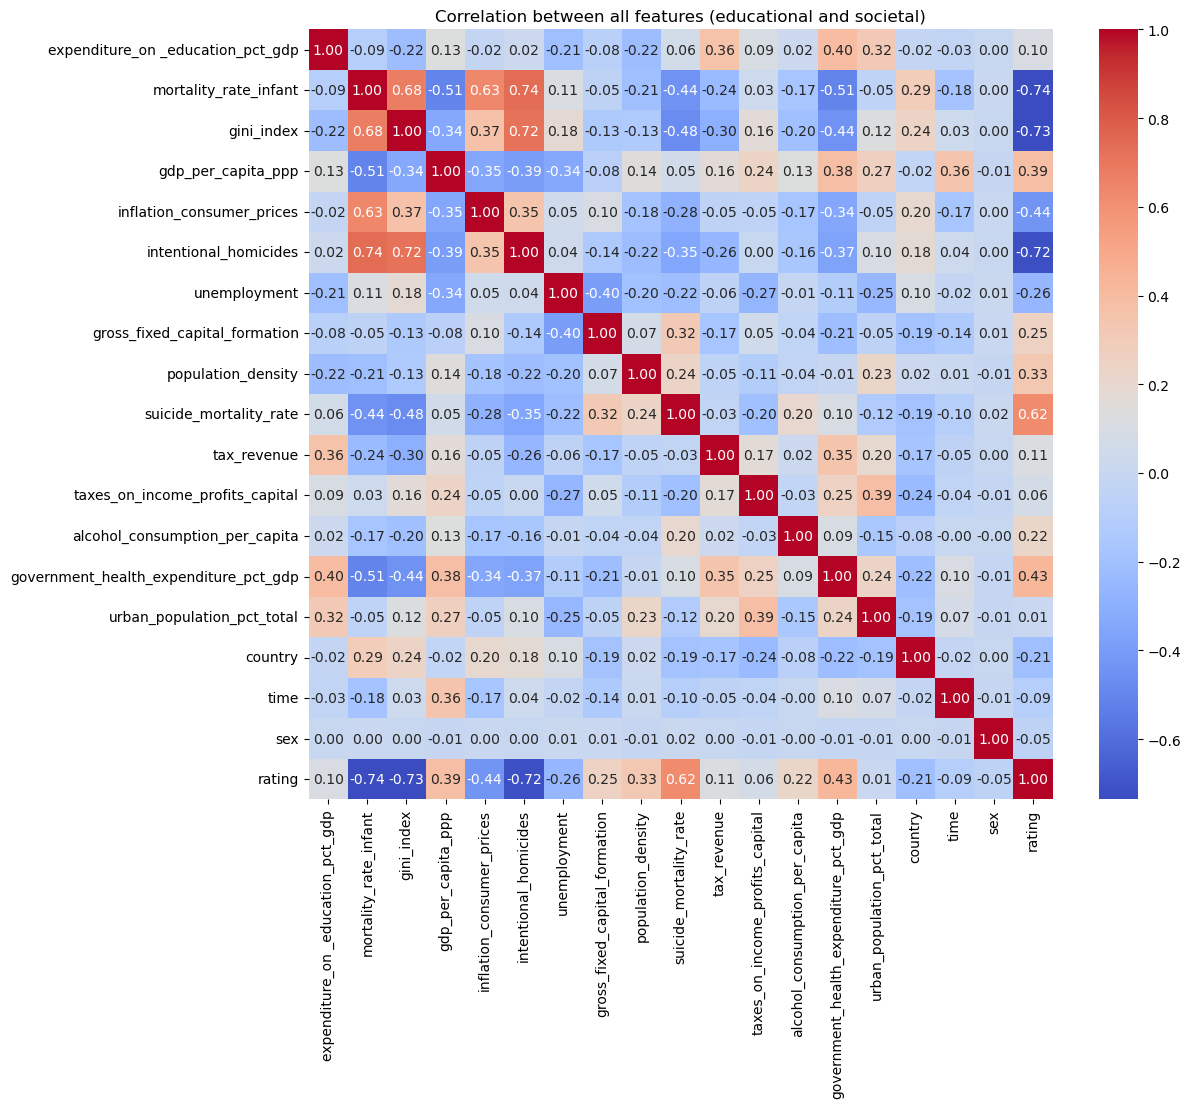

In [2728]:
# Find highest correlating values

data = df[df.columns[1:]] # doens't include 'index_code' because it's the same as 'country' and 'time' features
print(data.corr()["expenditure_on _education_pct_gdp"].sort_values(ascending=False))
print("---------------------------")
print(data.corr()["rating"].sort_values(ascending=False))

# Using a seaborn heatmap for better visualization of all correlations in the data set
# sns.heatmap parameters: 
# df[df.columns[1:]].corr() is all correlations excluding index_code because it is already covered for
# annot=True displays the numbers in the boxes
# fmt=".2f" formats the text to 2 decimal places
# cmap="coolwarm" changes color scheme
import seaborn as sns
plt.figure(figsize=(12,10)) # Changes size of figure
sns.heatmap(df[df.columns[1:]].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation between all features (educational and societal)")
plt.show()



### NOTE
We will use features with a correlation value greater than or equal to |0.2| to rating and education expenditure as percentage of GDP as they suggest some level of correlation.

In [2729]:
# Selecting features with a high correlation to eduction expenditure as a percentage of gdp and PISA rating
X_features = ['country', 
              'tax_revenue', 
              'taxes_on_income_profits_capital', 
              'intentional_homicides', 
              'gini_index', 
              'time', 
              'mortality_rate_infant', 
              'gdp_per_capita_ppp', 
              'unemployment',
              'suicide_mortality_rate',
              'government_health_expenditure_pct_gdp',
              'population_density', 
              'gross_fixed_capital_formation',
              'alcohol_consumption_per_capita']

# Creating testing and training data
X = df[X_features]
y = df['rating'].ravel() # ensures fully unwrapped result data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # split training and testing data to a 80% and 20% split


/var/folders/v5/m2dl5w7d7d3g58kr6_4w6__m0000gn/T/ipykernel_20605/1855052651.py:19: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y = df['rating'].ravel() # ensures fully unwrapped result data


In [2730]:
# Regressor baselines
mean_model = DummyRegressor(strategy="mean") # only predicts the mean
median_model = DummyRegressor(strategy="median") # onlly predicts the median

# Print baseline tests
print("Baseline Tests:\nMean K-fold Test:", cross_val_score(mean_model, X, y).mean())
print("Median K-fold Test:", cross_val_score(median_model, X, y).mean())


# Evaluating a linear regression model
linear_model = LinearRegression() # declare model
linear_model.fit(X_train, y_train) # training model
y_hat = linear_model.predict(X_test) # predict using model

# Print My model's tests
print("\nHand-crafted model test:\nMean squared error:", mean_squared_error(y_test, y_hat))
print("K-fold test:", cross_val_score(linear_model, X, y).mean()) # I learned that default scoring is R^2
print("Standard R^2:", linear_model.score(X_test, y_test)) # I learned R^2 is default test. Same as using r2_score from sklearn.metrics


Baseline Tests:
Mean K-fold Test: -0.11314423867810249
Median K-fold Test: -0.08351284497833125

Hand-crafted model test:
Mean squared error: 227.02584045814552
K-fold test: 0.612043014230359
Standard R^2: 0.8424883314679262


### Meaning of Tests
Turns out baselines aren't too hard to beat with regressions haha. 
My model is has a decent deterministic scores of with around .61 R^2 K-fold and .75 standard R^2 metrics. Mean squared error: 313.14 suggests a lot of spread between data points and regression line. These mean the model isn't the best indicator of PISA scores just with the limited information given to it. With only around a accuracy score of 61% and a big mean suqared error.

I also realized that training the model solely on features with high correlations doesn't produce a model that much more accurate than testing 

[ 2.71582053e-01 -8.20298102e-01  5.32107827e-01 -8.93274710e-01
 -1.73088566e+00 -8.58794590e-01 -2.93329615e+00  2.61385276e-05
  8.00264371e-02  1.47393527e+00  2.40170426e+00  4.29754166e-02
  9.37806109e-01  1.78359826e+00]


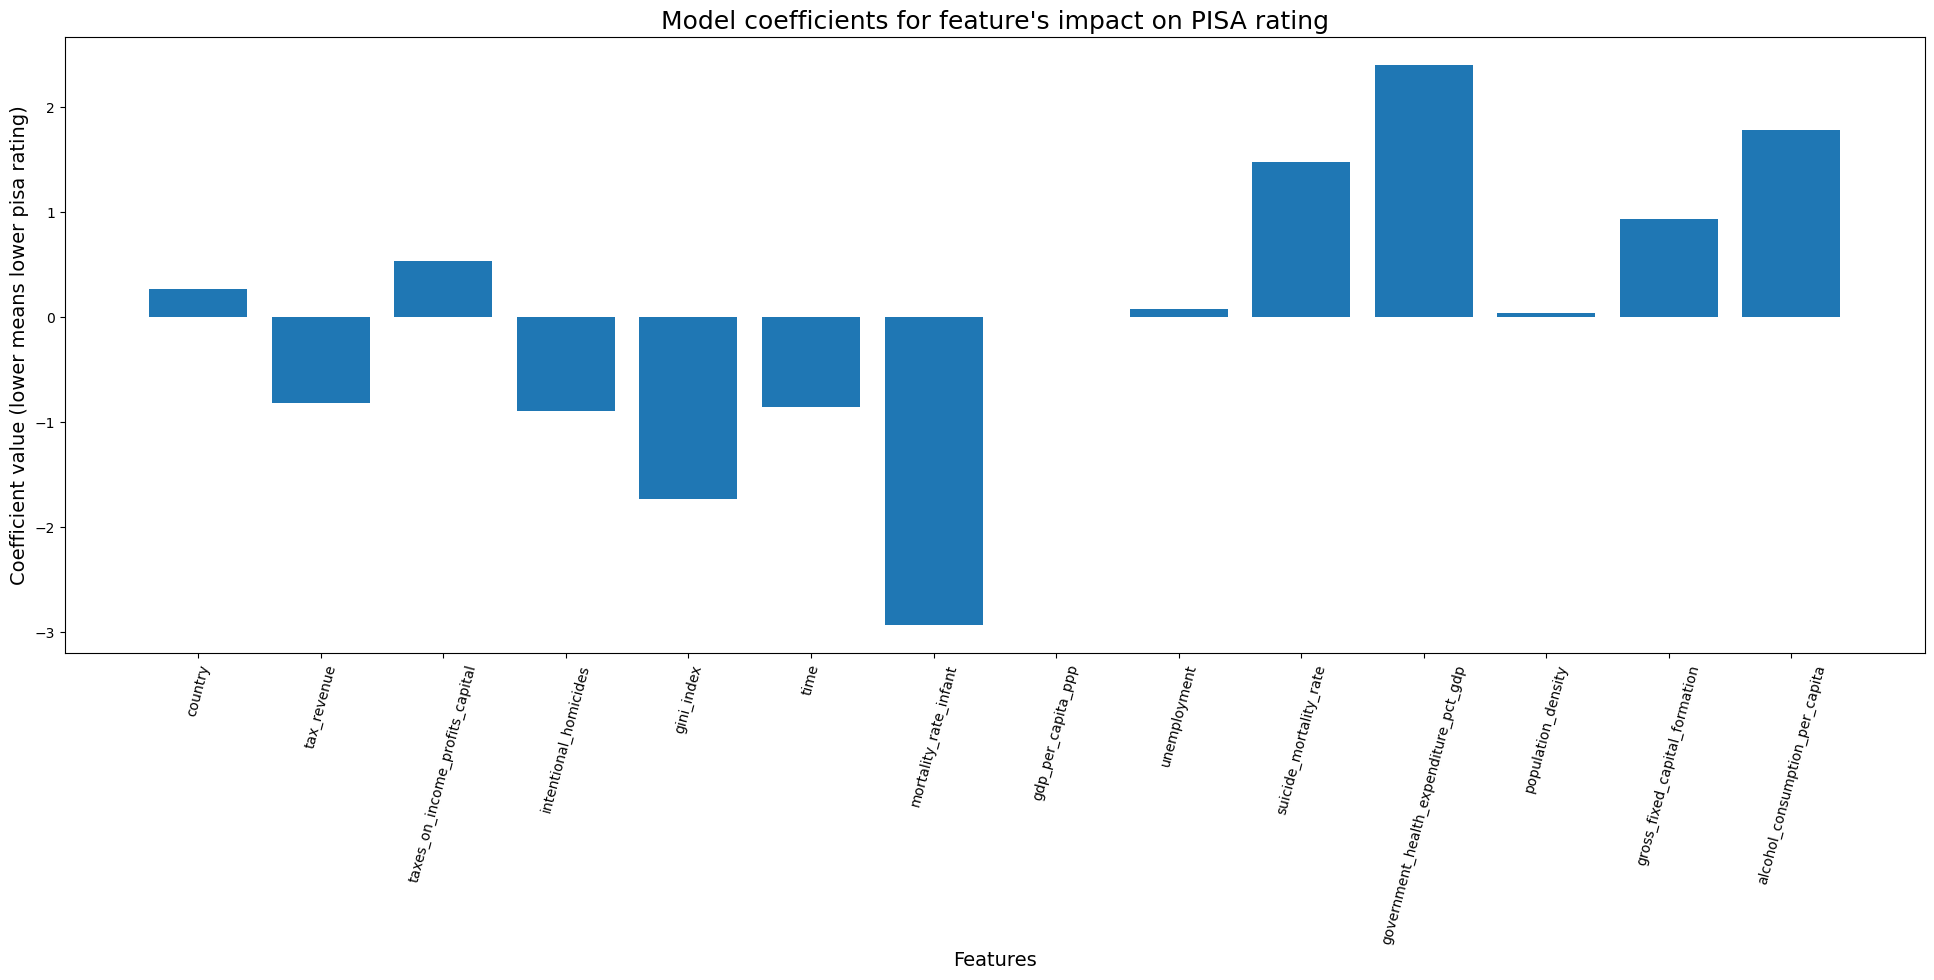

In [2731]:
# Gather coefficients to determine correlation
coefficients = linear_model.coef_
print(coefficients)

# Plotting coefficients
plt.figure(figsize=(24,8))
plt.bar(X_features, coefficients)
plt.title("Model coefficients for feature's impact on PISA rating", fontsize=18)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Coefficient value (lower means lower pisa rating)", fontsize=14)
plt.xticks(rotation=75)  # rotate labels 45 degrees for readability
plt.show()

### Meaning of first graph:

Some data is features are deemed far more impactful than others


Kitchen Sink model test:
Mean squared error: 255.18704937822102
K-fold test: 0.5874699752955099
Standard R^2: 0.8232218431409091
[ 6.28040628e-01 -2.71475847e+00 -1.81626347e+00  7.34504286e-05
  4.22237294e-01 -1.00128628e+00  2.16230244e-02  7.20310918e-01
  3.52338854e-02  1.67269125e+00 -8.34970484e-01  6.05971037e-01
  8.39004305e-01  2.19730727e+00 -6.96603804e-02  2.50547519e-01
 -8.00095776e-01 -2.63061780e+00]


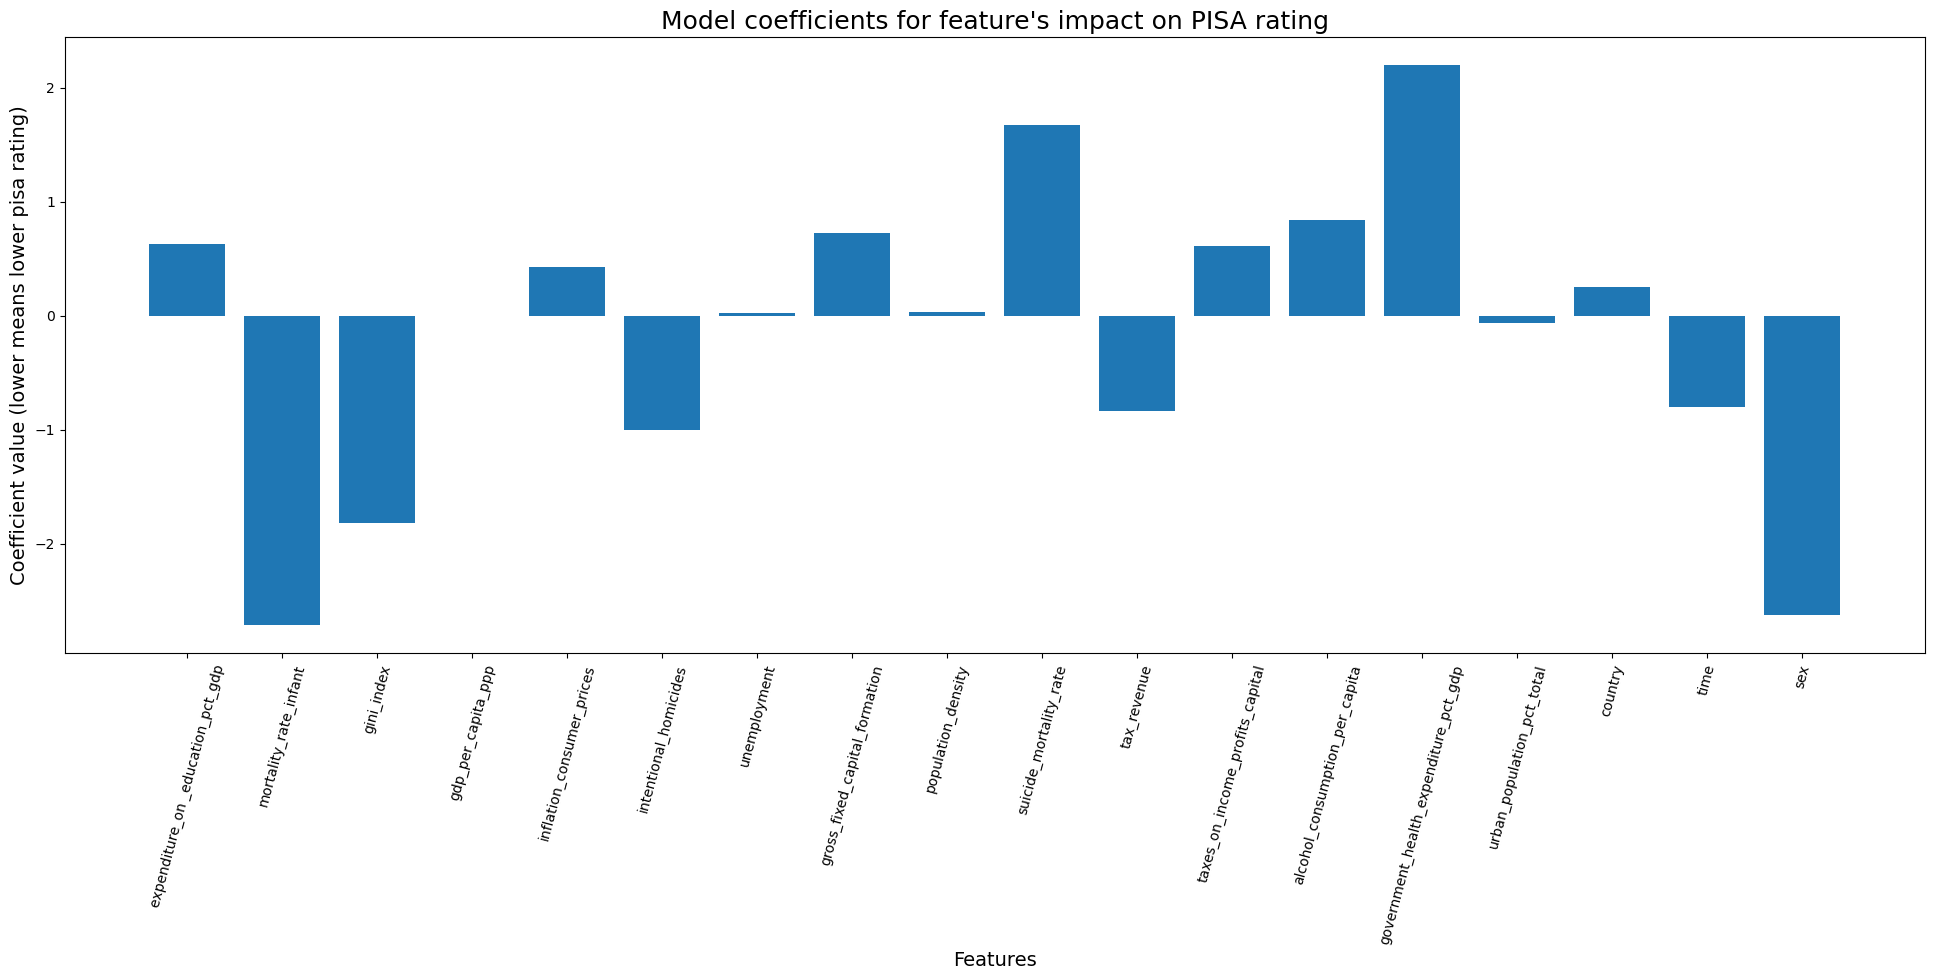

In [2732]:
# Trying Kitchen Sink Data training

X_features = df.columns[1:-1] # grab all variables except redundant index_code and y
X = df[X_features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # split training and testing data to a 80% and 20% split

linear_model.fit(X_train, y_train)
y_hat = linear_model.predict(X_test) # model predictions
print("\nKitchen Sink model test:\nMean squared error:", mean_squared_error(y_test, y_hat))
print("K-fold test:", cross_val_score(linear_model, X, y).mean())
print("Standard R^2:", linear_model.score(X_test, y_test))

# Gather coefficients to determine correlation
coefficients = linear_model.coef_
print(coefficients)

# Plotting coefficients
plt.figure(figsize=(24,8))
plt.bar(X_features, coefficients)
plt.title("Model coefficients for feature's impact on PISA rating", fontsize=18)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Coefficient value (lower means lower pisa rating)", fontsize=14)
plt.xticks(rotation=75)  # rotate labels 45 degrees for readability
plt.show()


This Is a bigger chart of all the features. We can see similar results to features in the hand-crafted model and correlation chart.


Alcohol consumption can be discounted because it has a huge number of missing values during preprocessing

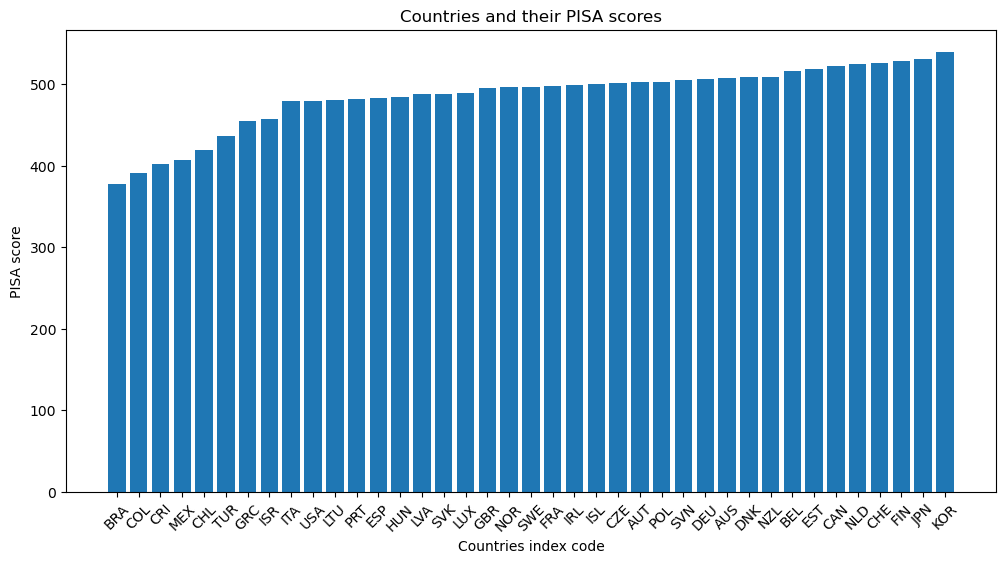

Max score: 562.114
Min score: 348.0
Min mean score: 377.48299999999995
Max mean score: 539.6281666666667


/var/folders/v5/m2dl5w7d7d3g58kr6_4w6__m0000gn/T/ipykernel_20605/3905662771.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Min mean score:", country_scores_sorted[0])
/var/folders/v5/m2dl5w7d7d3g58kr6_4w6__m0000gn/T/ipykernel_20605/3905662771.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Max mean score:", country_scores_sorted[-1])


In [2733]:
# Visulizing distrubtions of scores alongside the countries they belong to 

# Since the dataset spltis into 3 rows, each with differnt PISA scores for Boys, Girls and TOT,
# I am taking the mean score per country
mean_scores_per_country = []
for country in np.arange(0,39): # country columns are factorized into numbers, explaining arage
    mean_scores_per_country.append(df[df['country'] == country]['rating'].mean())

country_scores = pd.Series(mean_scores_per_country, index=countries) # convert the country score means into a series for easier sorting and using the countries list I saved earlier as a label

country_scores_sorted = country_scores.sort_values(ascending=True) # sort

plt.figure(figsize=(12, 6))
plt.bar(country_scores_sorted.index, country_scores_sorted.values)
plt.xticks(rotation=45)
plt.title("Countries and their PISA scores")
plt.xlabel("Countries index code")
plt.ylabel("PISA score")
plt.show()



print("Max score:", df['rating'].max())
print("Min score:", df['rating'].min())
print("Min mean score:", country_scores_sorted[0])
print("Max mean score:", country_scores_sorted[-1])

### Limitations
* PISA scores are individualized by subject (math, science, and reading), whereas this dataset only includes the mean score per country across the 5 tests taken from 2003 to 2018. 
* This data set also only includes 39 of the 79 countries that have taken the PISA exam from 2003 to 2018
* Missing values are replaced by the mean values within each column. This impacts data validity, especially with the measurement of alcohol consumption per capita (Feature: alcohol_consumption_per_capita), which has most of its values missing.
* There are other correlations not accounted for in the data/models. High government spending on health can be related to having more wealth, which correlates with higher education.
* There are simply so many features and government-related information that aren’t present in the data, which can explain the data’s results. 


### Conclusion
In trying to decipher which economic and social conditions impact educational well-being within a country, I further supported the importance of a quality education within countries, as countries with higher PISA scores tend to have lower rates of infant mortality, Gini index, and intentional homicides. I’ve also found that increasing government expenditure on health and education also boosts this score, and thus educational wellbeing. That said, many unaccounted confounding variables should be considered. 

Unfortunately, my models failed to predict outside of standard correlations, and we can only get predictions on the PISA scores. 
